## Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from pycaret.regression import *

## Load data

In [4]:
train=pd.read_csv('df_train.csv')
test=pd.read_csv('df_test.csv')

## Data Processing, Exploratory Analysis

In [12]:
missing_values_count = train.isnull().sum()
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp        

In [5]:
print(train.head())

# Check the shape of the dataset
print("Shape of dataset:", train.shape)

# Check for missing values
print("Missing values:\n", train.isnull().sum())


   Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0    

In [6]:
# Extract city names from column names
city_names = [col.split('_')[0] for col in train_data.columns if '_' in col]

# Create a dictionary to store the count of data points for each city
city_data_count = {}

# Count the number of data points for each city
for city in set(city_names):
    city_count = sum(col.startswith(city) for col in train_data.columns)
    city_data_count[city] = city_count

# Print the count of data points for each city
print("Number of data points for each city:")
for city, count in city_data_count.items():
    print(f"{city}: {count}")


Number of data points for each city:
load: 1
Valencia: 8
Seville: 10
Barcelona: 9
Bilbao: 10
Madrid: 9


In [7]:
# Create a dictionary to store data points for each city
city_data_points = {}

# Iterate through city names
for city in set(city_names):
    city_data_points[city] = [col for col in train_data.columns if col.startswith(city)]

# Print data points for each city
print("Data points available for each city:")
for city, data_points in city_data_points.items():
    print(f"{city}: {data_points}")

# Count the number of rows for each data point
data_point_row_count = {}
for city, data_points in city_data_points.items():
    for data_point in data_points:
        data_point_row_count[data_point] = train_data[data_point].count()

# Print the count of rows for each data point
print("\nNumber of rows for each data point:")
for data_point, row_count in data_point_row_count.items():
    print(f"{data_point}: {row_count}")


Data points available for each city:
load: ['load_shortfall_3h']
Valencia: ['Valencia_wind_deg', 'Valencia_wind_speed', 'Valencia_snow_3h', 'Valencia_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Valencia_humidity', 'Valencia_temp_min']
Seville: ['Seville_humidity', 'Seville_clouds_all', 'Seville_wind_speed', 'Seville_pressure', 'Seville_rain_1h', 'Seville_rain_3h', 'Seville_weather_id', 'Seville_temp_max', 'Seville_temp', 'Seville_temp_min']
Barcelona: ['Barcelona_wind_speed', 'Barcelona_wind_deg', 'Barcelona_rain_1h', 'Barcelona_pressure', 'Barcelona_rain_3h', 'Barcelona_weather_id', 'Barcelona_temp_max', 'Barcelona_temp', 'Barcelona_temp_min']
Bilbao: ['Bilbao_rain_1h', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Bilbao_wind_deg', 'Bilbao_snow_3h', 'Bilbao_pressure', 'Bilbao_weather_id', 'Bilbao_temp_min', 'Bilbao_temp', 'Bilbao_temp_max']
Madrid: ['Madrid_wind_speed', 'Madrid_humidity', 'Madrid_clouds_all', 'Madrid_rain_1h', 'Madrid_weather_id', 'Madrid_pressure', 'Madrid_temp_m

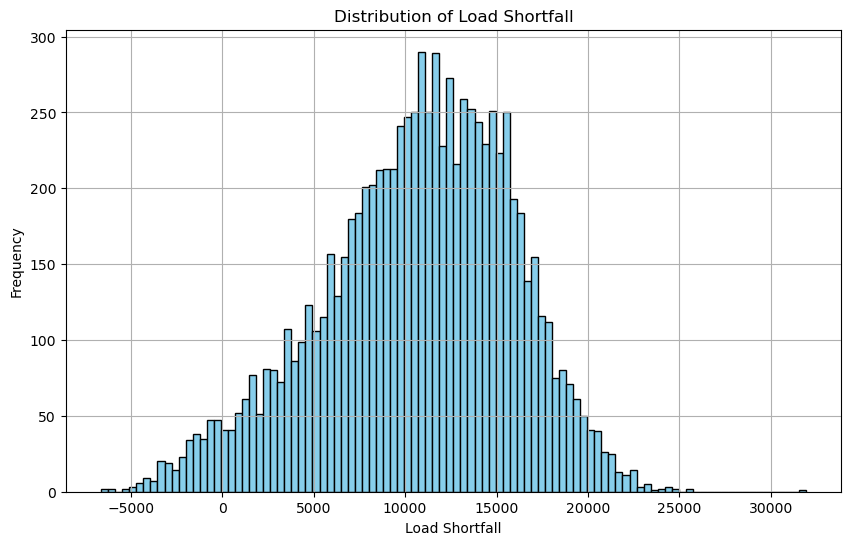

In [15]:
# Plot the distribution of the shortfall values
plt.figure(figsize=(10, 6))
plt.hist(train['load_shortfall_3h'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Load Shortfall')
plt.xlabel('Load Shortfall')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

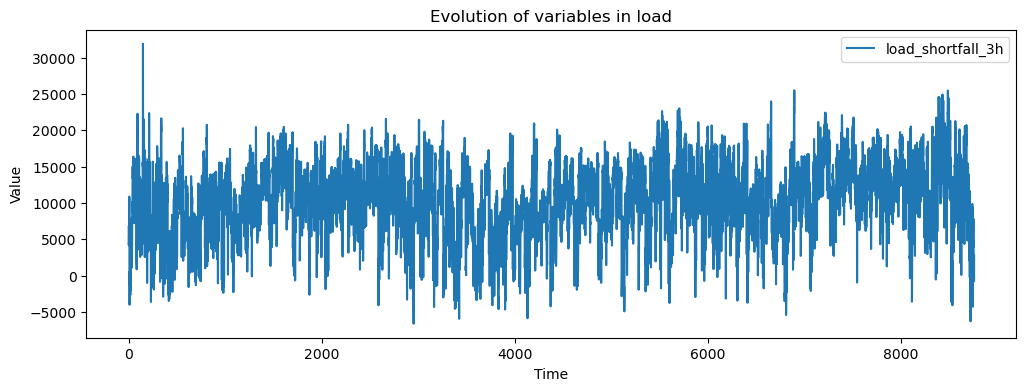

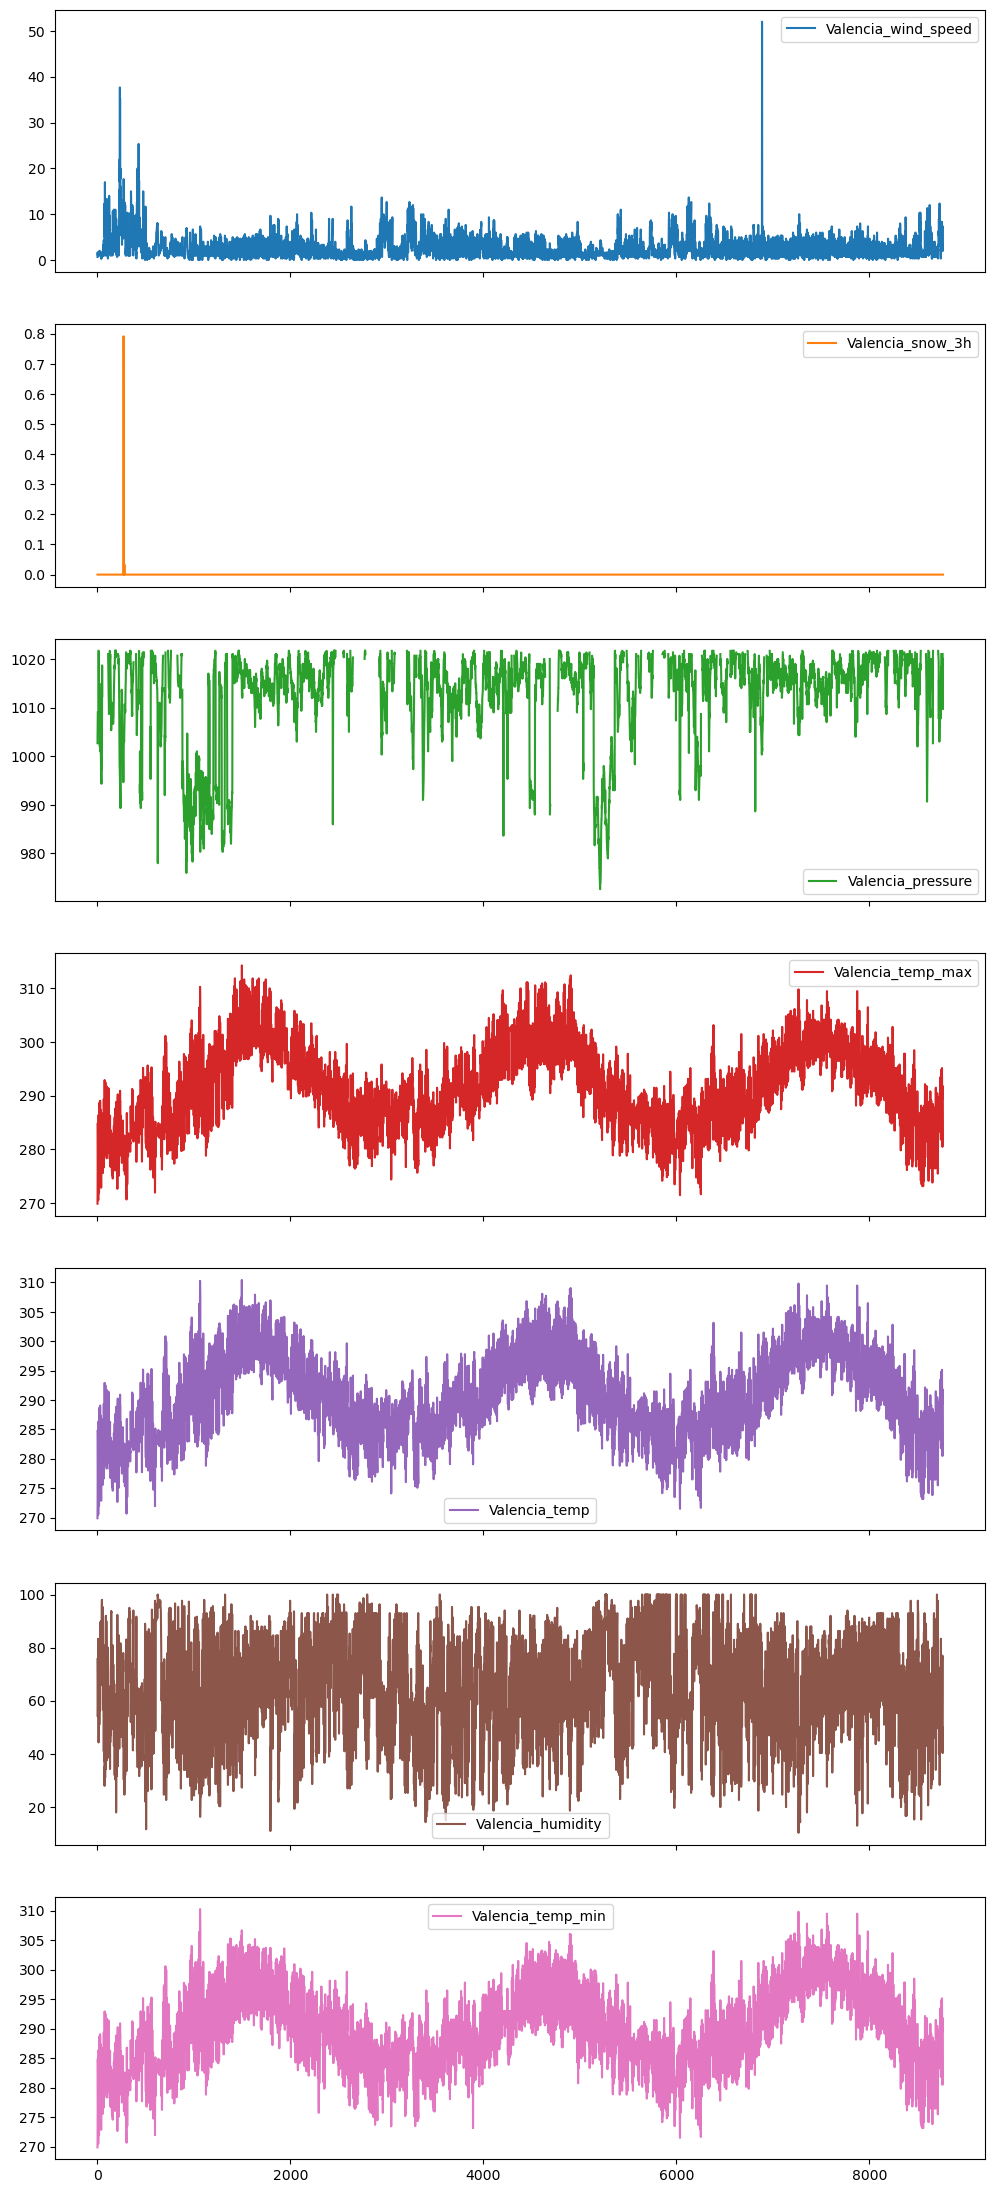

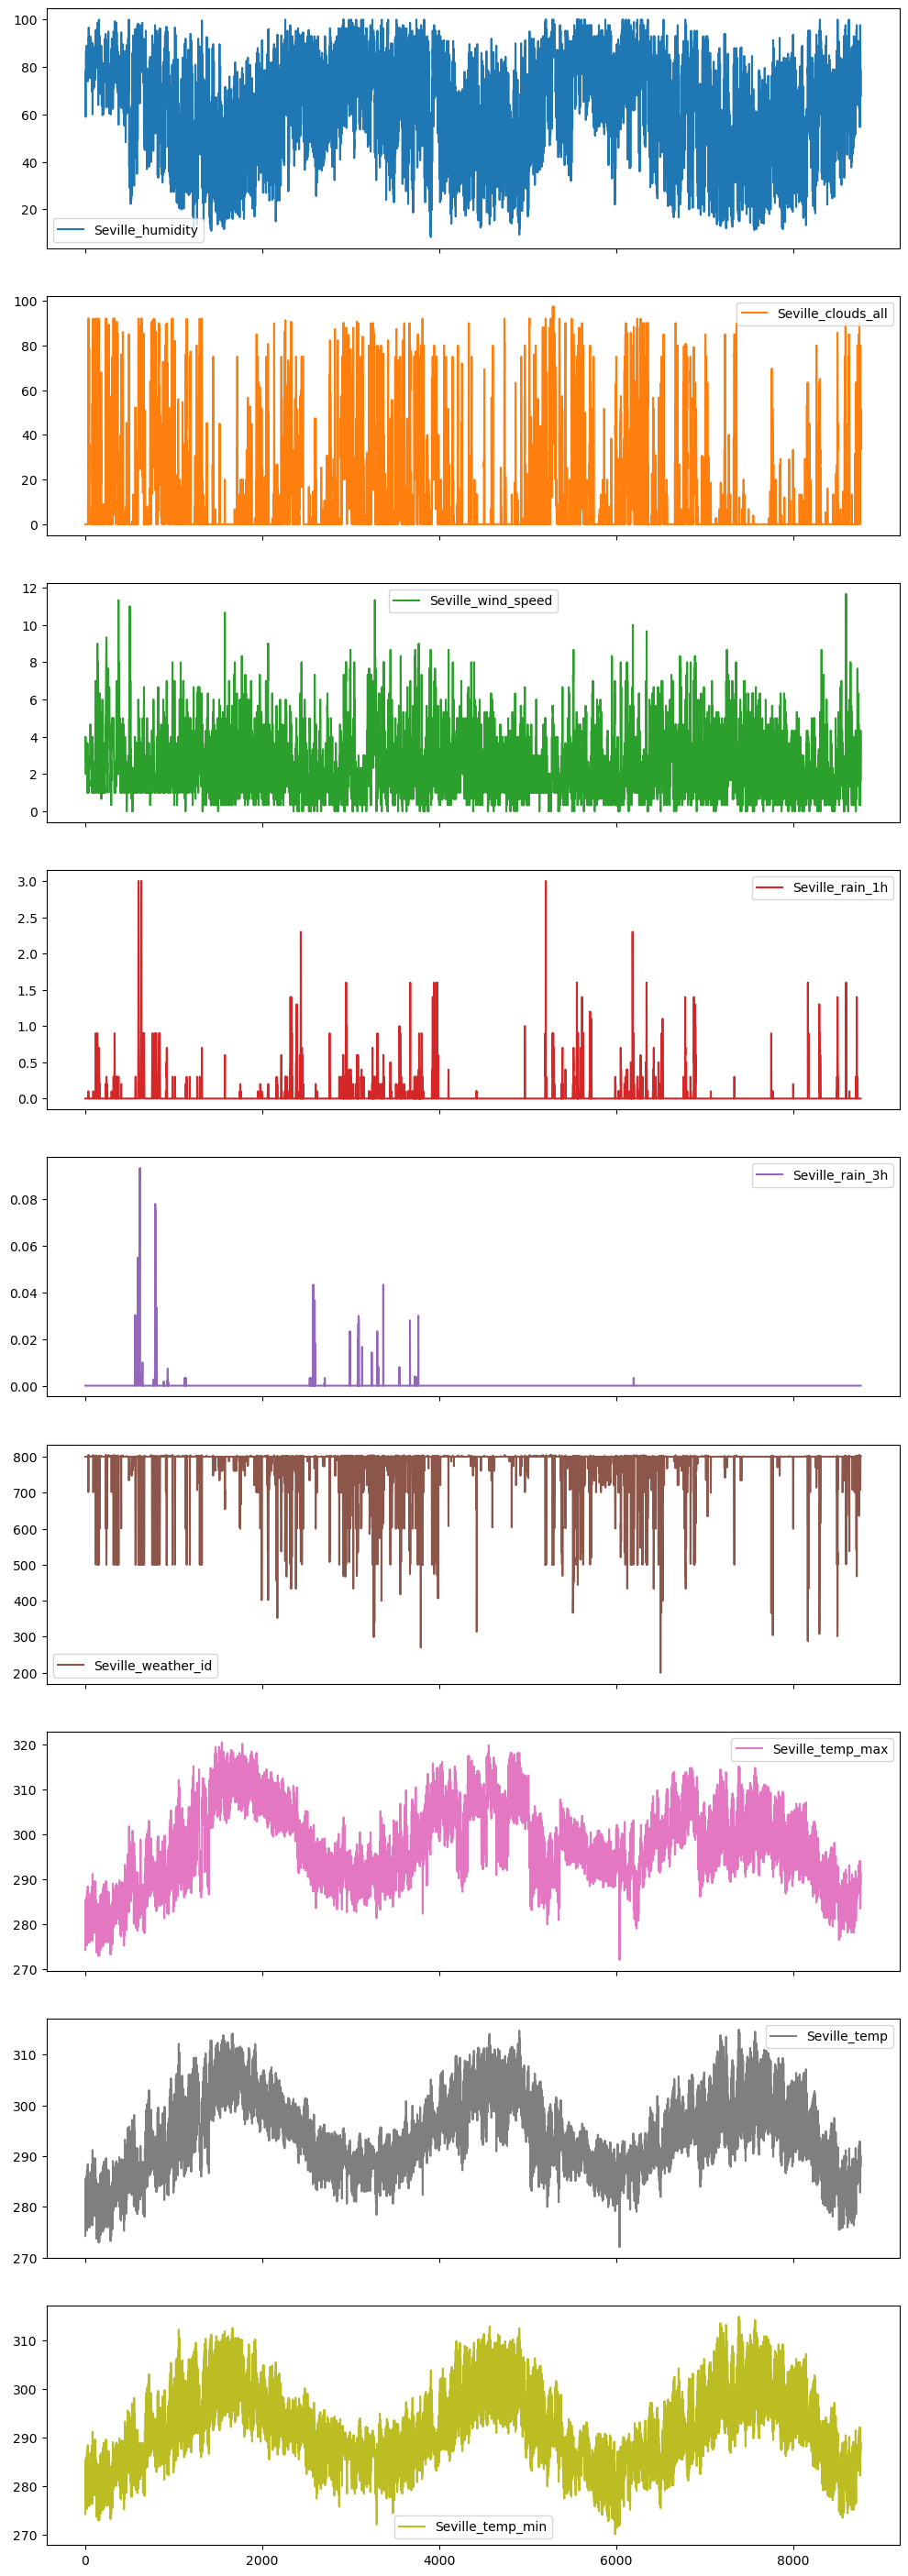

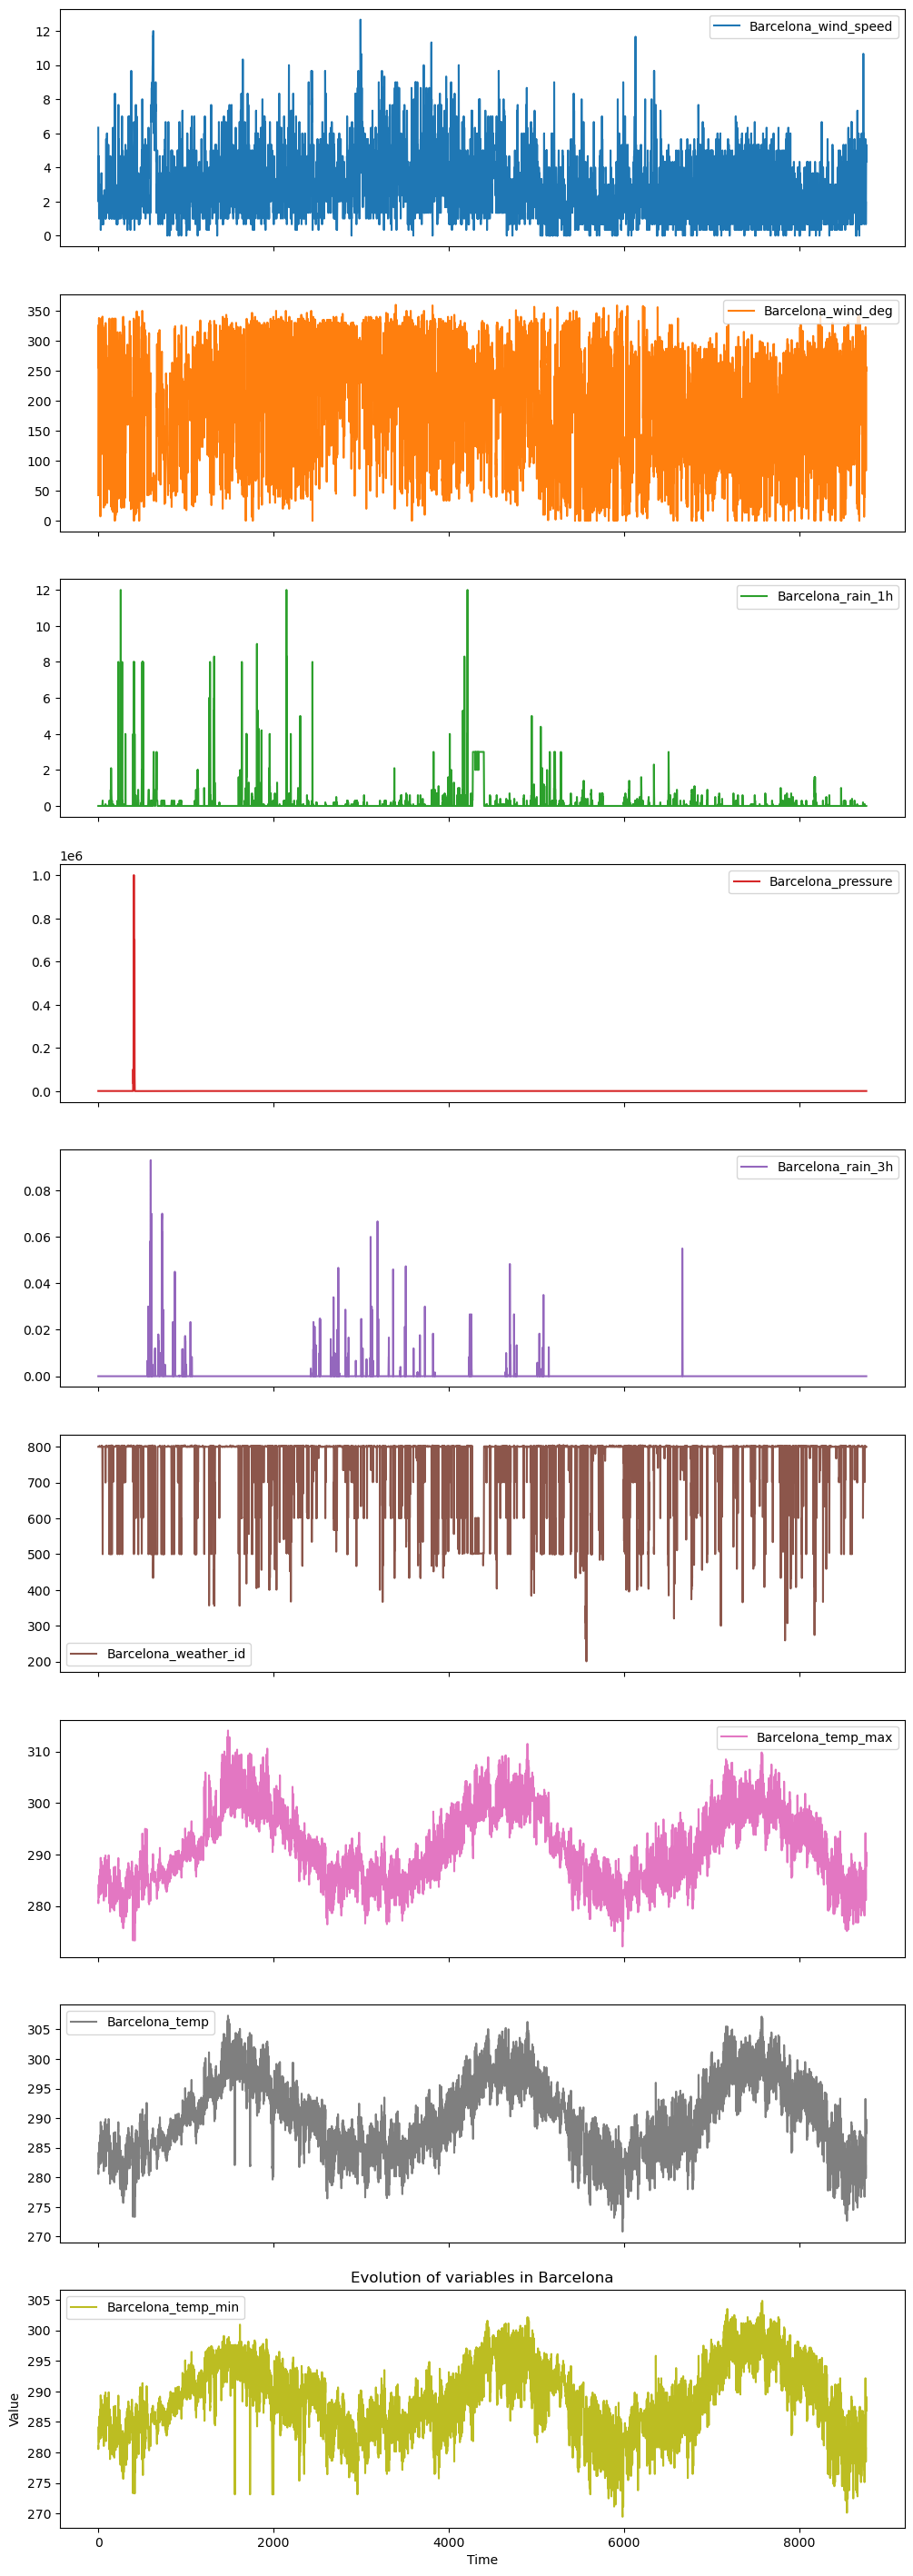

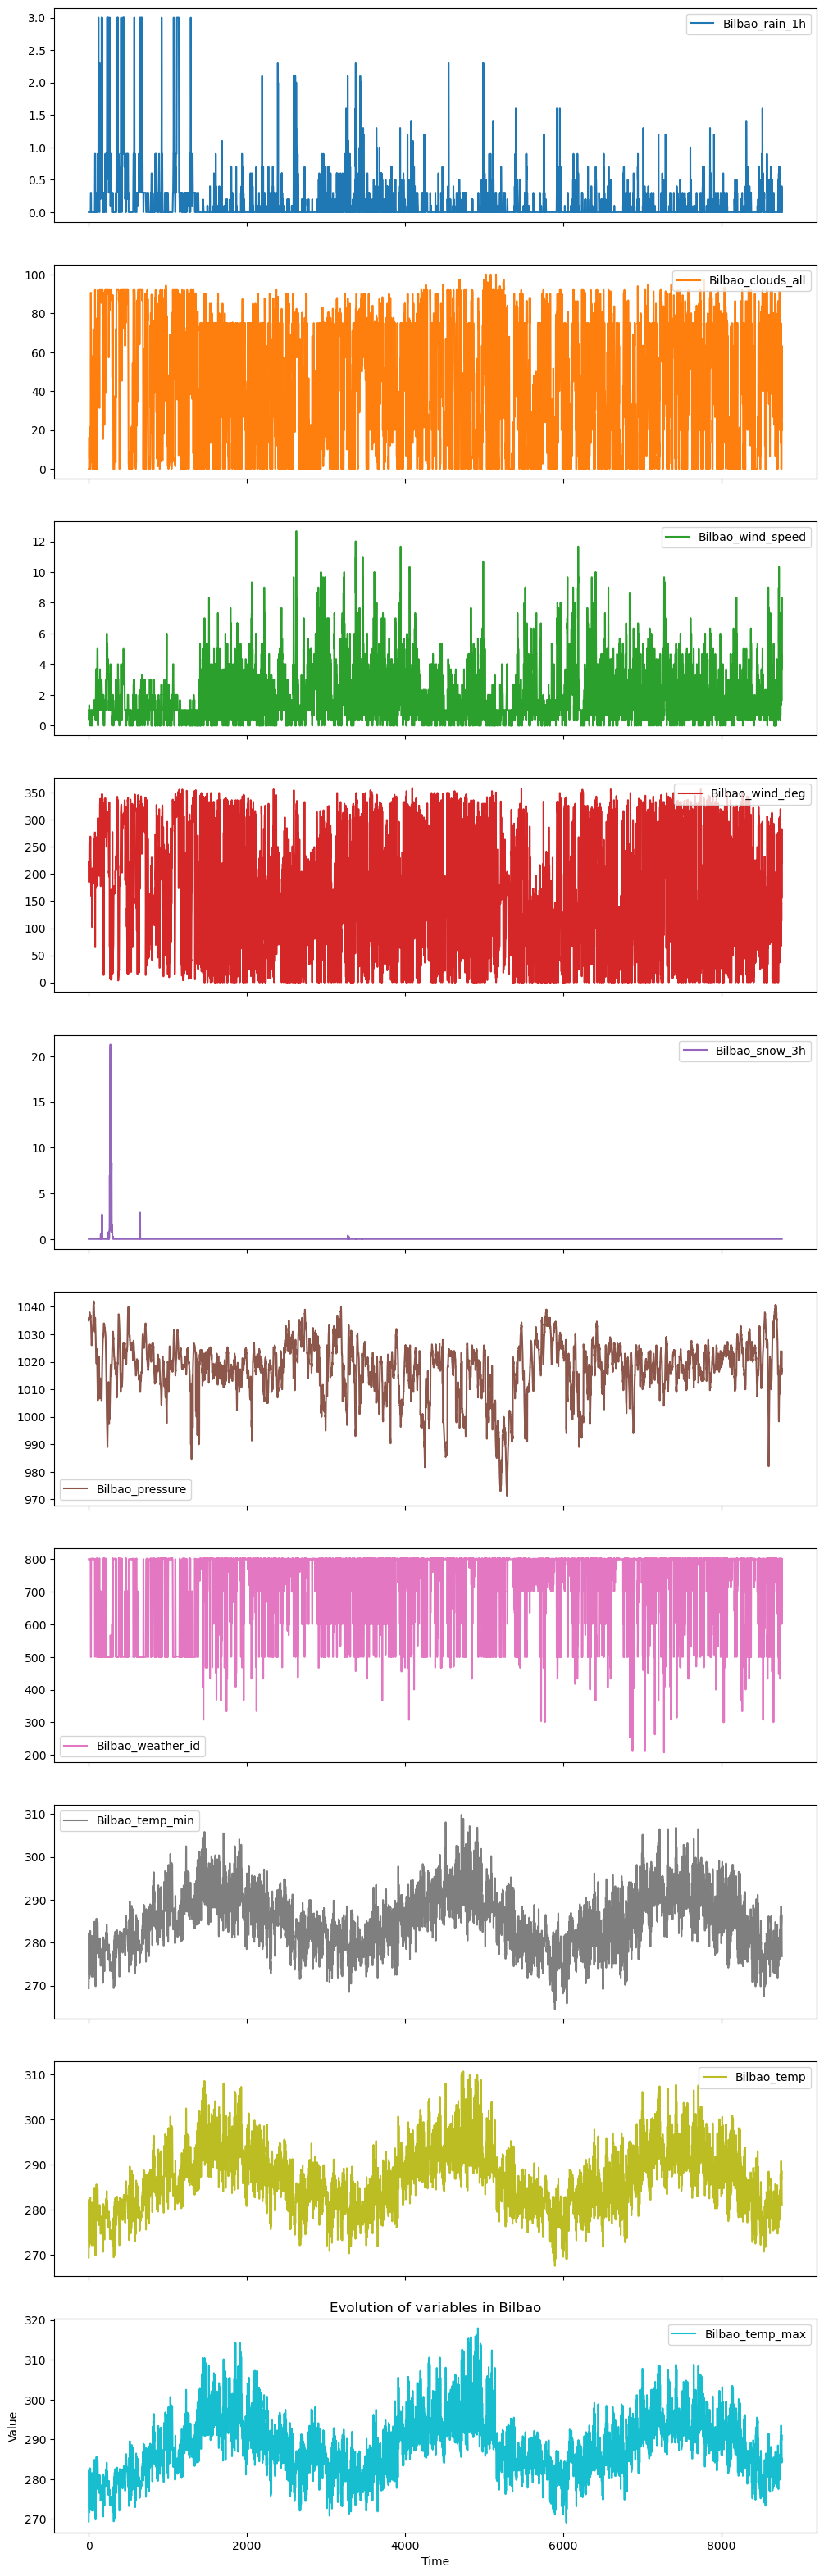

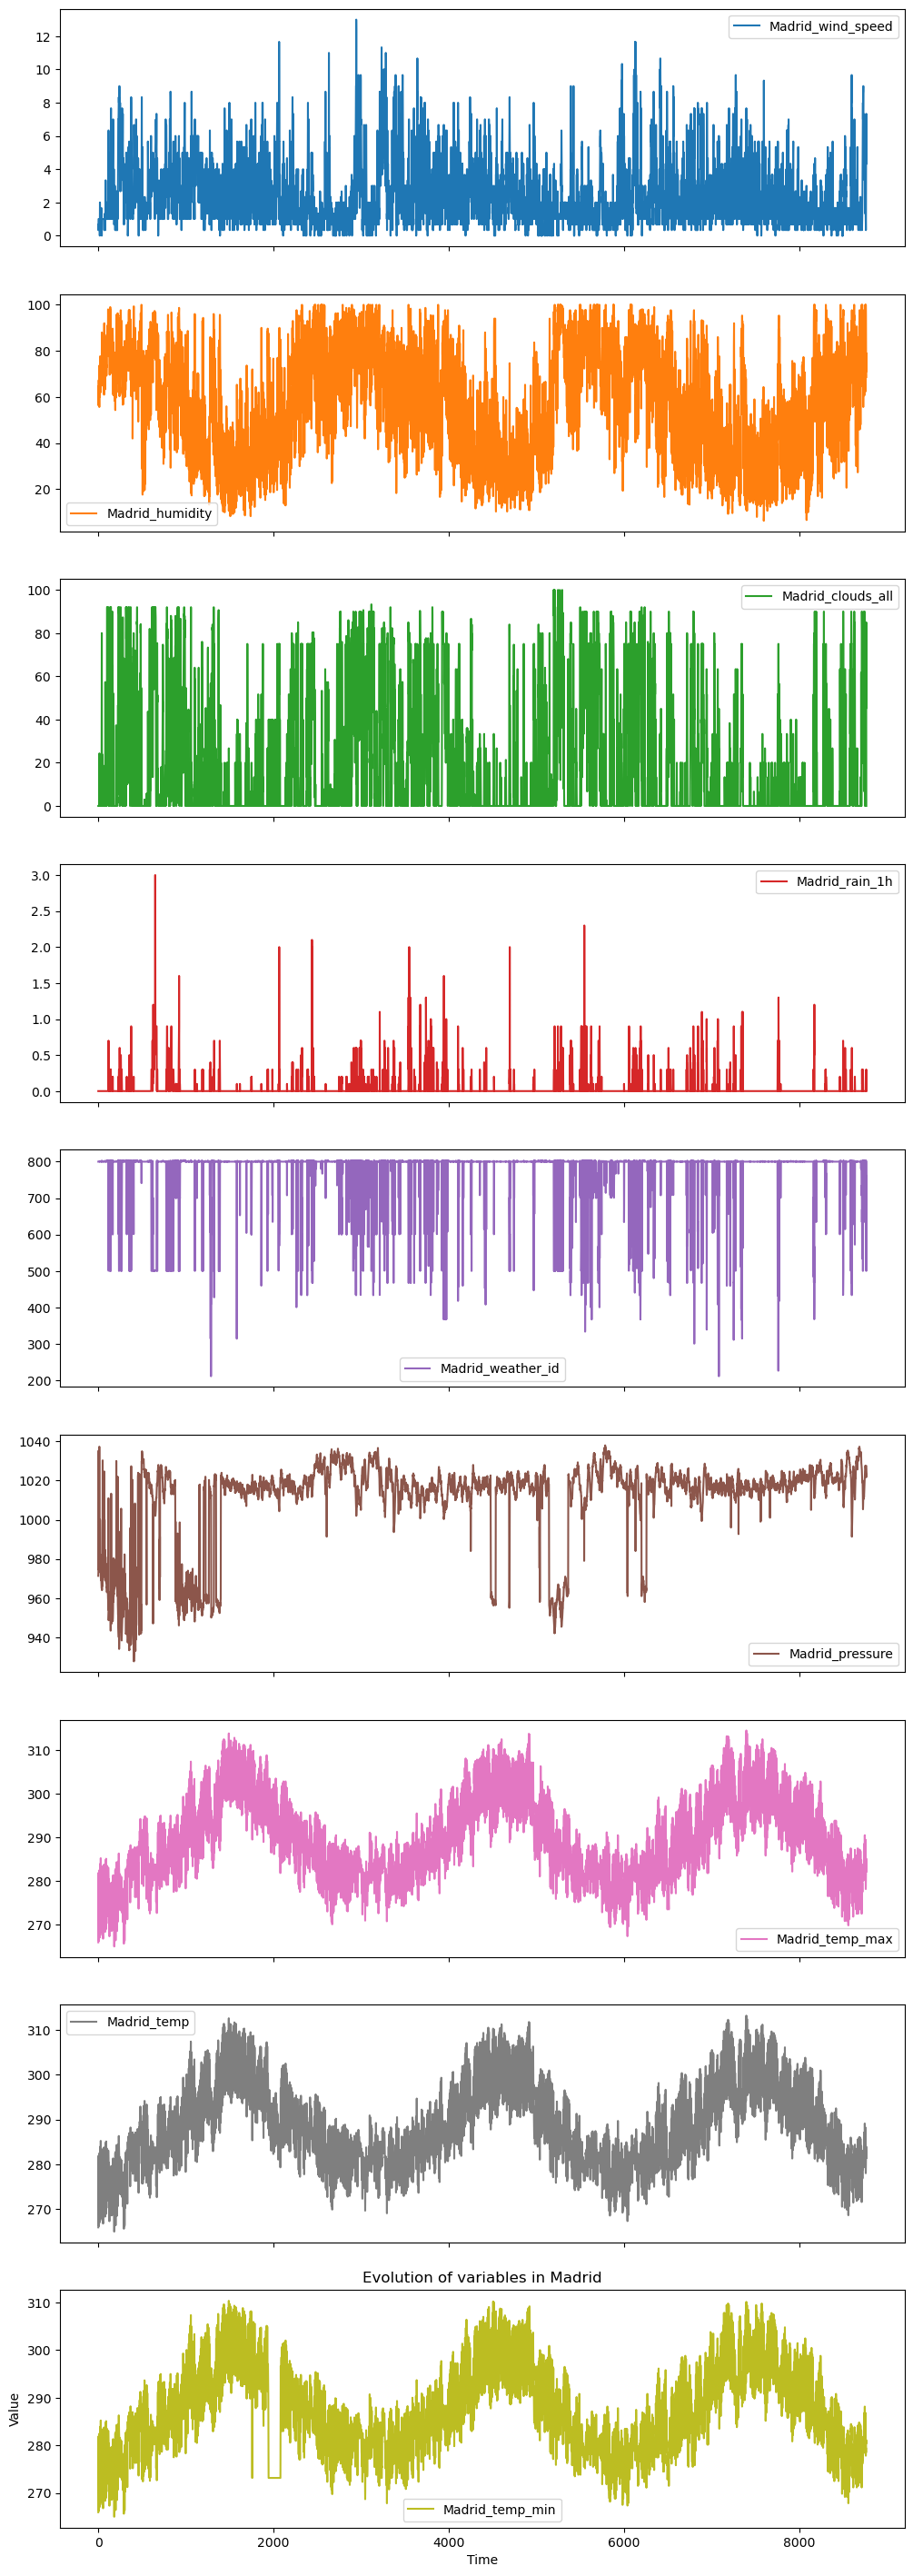

ValueError: could not convert string to float: '2015-01-01 03:00:00'

<Figure size 1200x800 with 0 Axes>

In [16]:
city_names = list(set([col.split('_')[0] for col in train.columns if '_' in col]))

# Create a dictionary to store data points for each city
city_data_points = {}
for city in city_names:
    city_data_points[city] = [col for col in train.columns if col.startswith(city)]

# 4. Check Data Quality
# a. Distribution of each variable
train.describe()

# b. Consistency (graph with evolution of temperature, wind, etc. over time)
plt.figure(figsize=(12, 8))
for city in city_names:
    city_columns = [col for col in train.columns if col.startswith(city)]
    train[city_columns].plot(kind='line', subplots=True, layout=(len(city_columns), 1), figsize=(12, len(city_columns) * 4))
    plt.title(f"Evolution of variables in {city}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

# c. Correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

/var/folders/x7/9nxbtwm54vn7smz2zfcz1xb40000gn/T/ipykernel_46034/1448090736.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


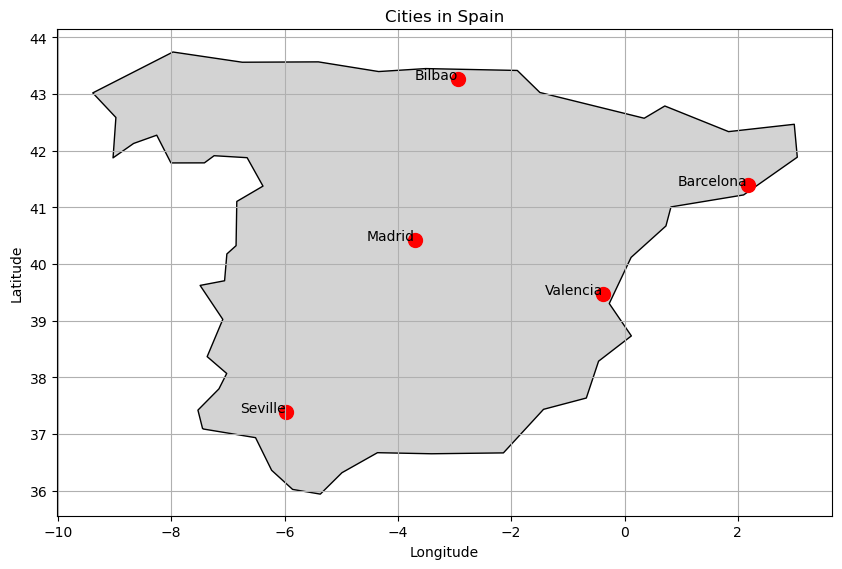

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Spain
spain = world[world['name'] == 'Spain']

# List of cities and their coordinates
cities = {
    'Madrid': (40.4168, -3.7038),
    'Valencia': (39.4699, -0.3763),
    'Seville': (37.3886, -5.9826),
    'Bilbao': (43.2630, -2.9340),
    'Barcelona': (41.3851, 2.1734)
}

# Create a GeoDataFrame for the cities
cities_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([coord[1] for coord in cities.values()], [coord[0] for coord in cities.values()]),
                               index=cities.keys(), columns=['geometry'])

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
spain.plot(ax=ax, color='lightgray', edgecolor='black')
cities_gdf.plot(ax=ax, marker='o', color='red', markersize=100)
for city, (lat, lon) in cities.items():
    ax.text(lon, lat, city, fontsize=10, ha='right')  # Add city names
ax.set_title('Cities in Spain')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


/var/folders/x7/9nxbtwm54vn7smz2zfcz1xb40000gn/T/ipykernel_46034/728996316.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_cloud_avg = cloud_data.resample('M').mean()


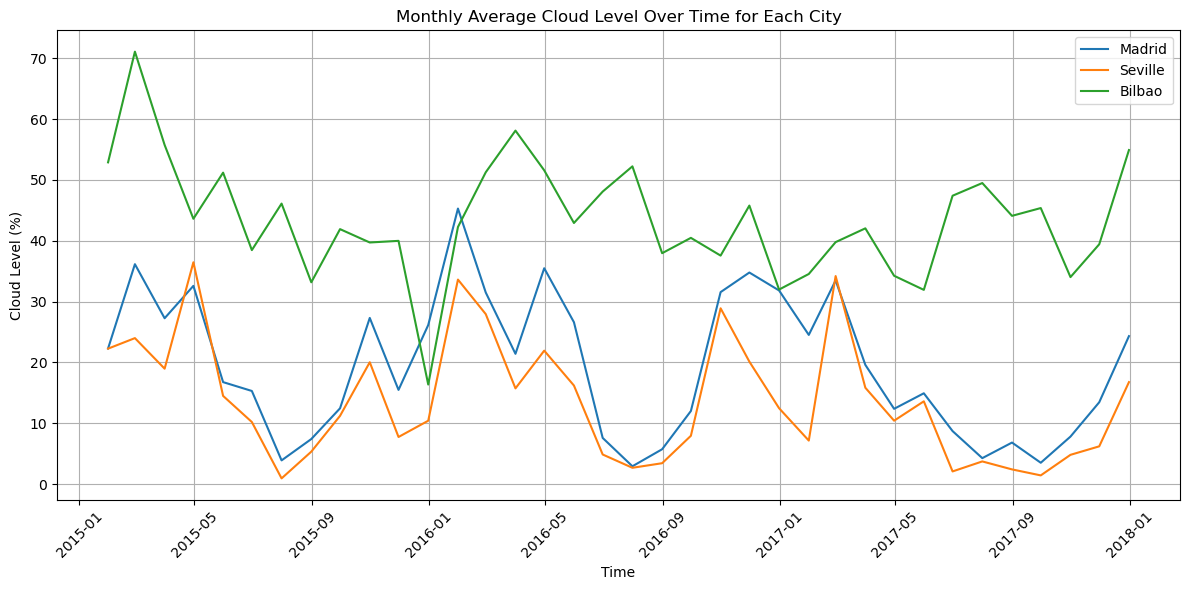

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load or define your DataFrame 'train' here if not already loaded

# Check if 'time' is a column, and if so, convert it to datetime and set as index
if 'time' in train.columns:
    train['time'] = pd.to_datetime(train['time'])
    train.set_index('time', inplace=True)
elif train.index.name != 'time':
    # Assuming the index should be 'time', if it's not set, raise an error or handle appropriately
    raise ValueError("Index is not set to 'time' and 'time' column is not present.")

# Selecting only the columns related to cloud levels
cloud_columns = [col for col in train.columns if 'clouds_all' in col]
cloud_data = train[cloud_columns]

# Resampling the cloud data by month and computing the mean
monthly_cloud_avg = cloud_data.resample('M').mean()

# Reset the index to use 'time' for plotting
monthly_cloud_avg.reset_index(inplace=True)

# Plotting the monthly average cloud levels
plt.figure(figsize=(12, 6))
plt.plot(monthly_cloud_avg['time'], monthly_cloud_avg['Madrid_clouds_all'], label='Madrid')
plt.plot(monthly_cloud_avg['time'], monthly_cloud_avg['Seville_clouds_all'], label='Seville')
plt.plot(monthly_cloud_avg['time'], monthly_cloud_avg['Bilbao_clouds_all'], label='Bilbao')

plt.title('Monthly Average Cloud Level Over Time for Each City')
plt.xlabel('Time')
plt.ylabel('Cloud Level (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/x7/9nxbtwm54vn7smz2zfcz1xb40000gn/T/ipykernel_46034/2027655834.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_wind_speed_avg = wind_speed_data.resample('M').mean()


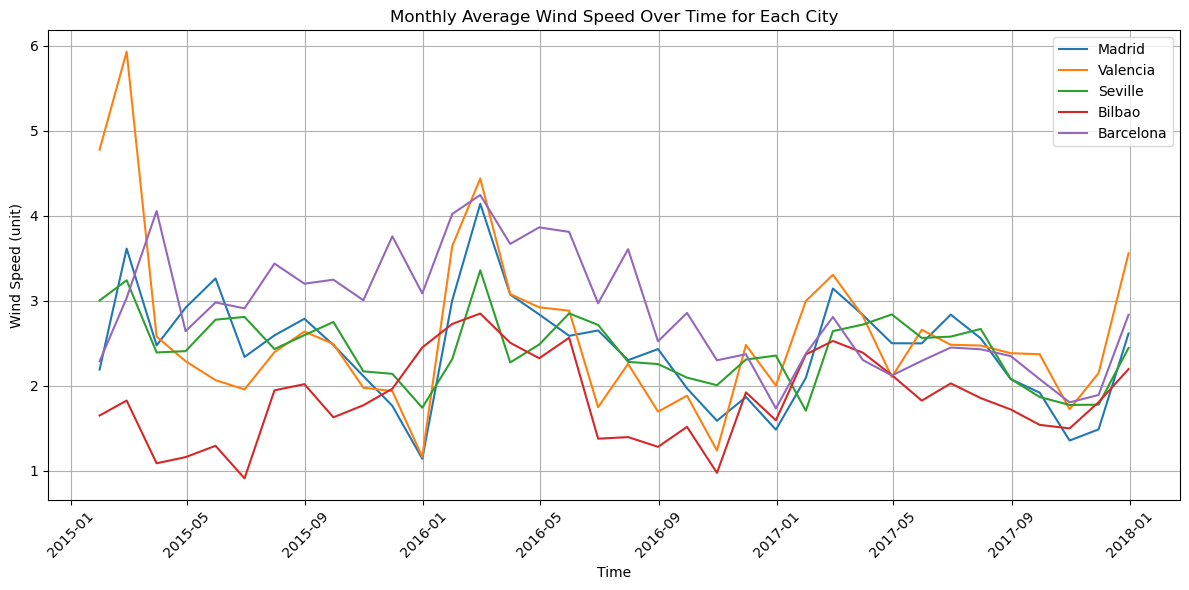

Barcelona_wind_speed    2.870497
Valencia_wind_speed     2.586272
Madrid_wind_speed       2.425729
Seville_wind_speed      2.425045
Bilbao_wind_speed       1.850356
dtype: float64


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your original DataFrame and is already loaded with data
# Check if 'time' is a column or index and convert it to datetime if needed
if 'time' in train.columns:
    train['time'] = pd.to_datetime(train['time'])
    train.set_index('time', inplace=True)
elif train.index.name != 'time':
    # If 'time' is neither a column nor the index name, raise an error or handle it
    raise ValueError("Index is not set to 'time' and 'time' column is not present.")

# Selecting only the columns related to wind speed for each city
wind_speed_columns = [col for col in train.columns if 'wind_speed' in col]
wind_speed_data = train[wind_speed_columns]

# Resampling the wind speed data by month and computing the mean
monthly_wind_speed_avg = wind_speed_data.resample('M').mean()

# Reset the index to use 'time' for plotting
monthly_wind_speed_avg.reset_index(inplace=True)

# Plotting the monthly average wind speeds
plt.figure(figsize=(12, 6))
plt.plot(monthly_wind_speed_avg['time'], monthly_wind_speed_avg['Madrid_wind_speed'], label='Madrid')
plt.plot(monthly_wind_speed_avg['time'], monthly_wind_speed_avg['Valencia_wind_speed'], label='Valencia')
plt.plot(monthly_wind_speed_avg['time'], monthly_wind_speed_avg['Seville_wind_speed'], label='Seville')
plt.plot(monthly_wind_speed_avg['time'], monthly_wind_speed_avg['Bilbao_wind_speed'], label='Bilbao')
plt.plot(monthly_wind_speed_avg['time'], monthly_wind_speed_avg['Barcelona_wind_speed'], label='Barcelona')

plt.title('Monthly Average Wind Speed Over Time for Each City')
plt.xlabel('Time')
plt.ylabel('Wind Speed (unit)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Selecting only the columns related to wind speed for each city
wind_speed_columns = [col for col in train.columns if 'wind_speed' in col]
wind_speed_data = train[wind_speed_columns]

# Calculating the mean wind speed for each city across the dataset
city_wind_speed_averages = wind_speed_data.mean()

# Sorting the cities from highest to lowest average wind speed
sorted_city_wind_speeds = city_wind_speed_averages.sort_values(ascending=False)

# Printing the sorted cities with their average wind speed
print(sorted_city_wind_speeds)


/var/folders/x7/9nxbtwm54vn7smz2zfcz1xb40000gn/T/ipykernel_46034/3986105788.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_shortfall_sum = train['load_shortfall_3h'].resample('M').sum()


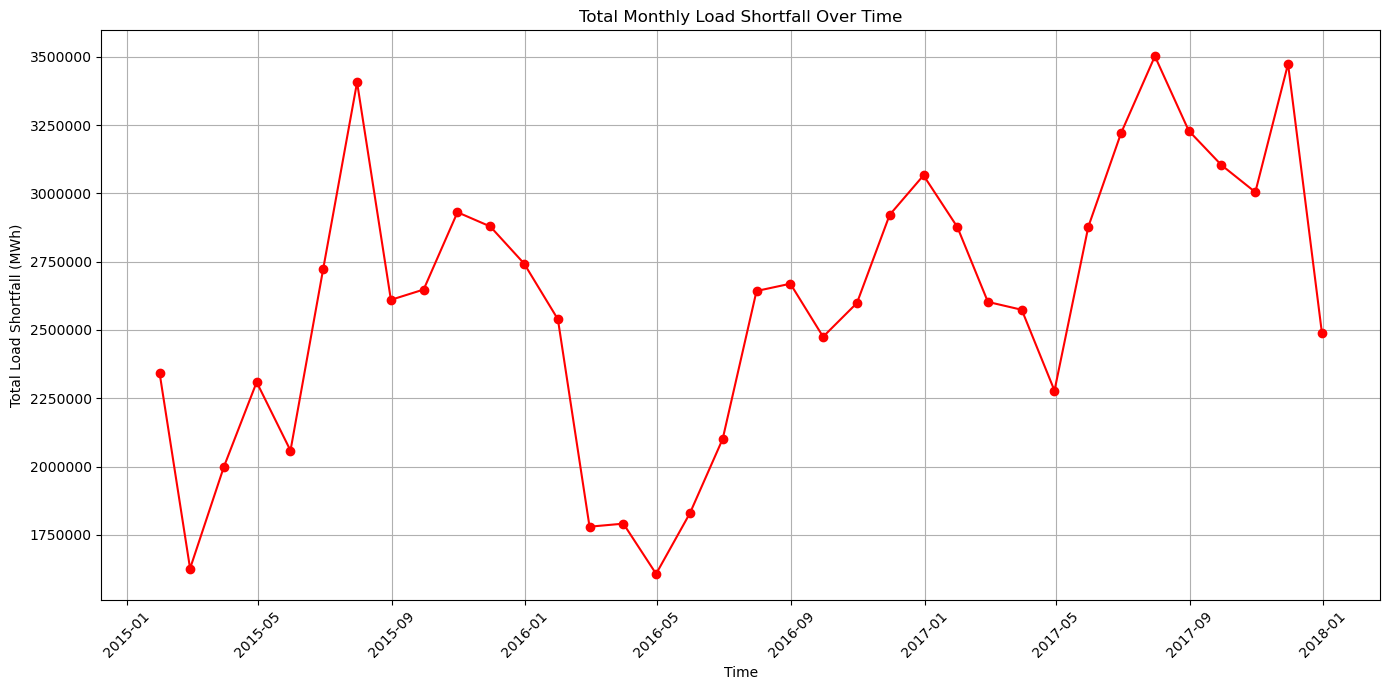

Average Monthly Shortfall: 2598194.840277778


In [70]:
from matplotlib.ticker import FuncFormatter
monthly_shortfall_sum = train['load_shortfall_3h'].resample('M').sum()

# Plotting the total monthly shortfall
plt.figure(figsize=(14, 7))
plt.plot(monthly_shortfall_sum.index, monthly_shortfall_sum, color='red', marker='o', linestyle='-')
plt.title('Total Monthly Load Shortfall Over Time')
plt.xlabel('Time')
plt.ylabel('Total Load Shortfall (MWh)')

# Custom function to format the y-axis labels without scientific notation
def custom_formatter(x, pos):
    return f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating the average of the monthly total shortfall values
average_monthly_shortfall = monthly_shortfall_sum.mean()

# Output the average monthly shortfall
print("Average Monthly Shortfall:", average_monthly_shortfall)

In [71]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'train' and 'test' DataFrames are pre-loaded
# Initialize a label encoder object
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Valencia_wind_deg', 'Seville_pressure']

# Applying the encoder to each column in both train and test datasets
for column in columns_to_encode:
    # Combine the data from train and test to ensure the encoder covers all possible categories
    full_data = pd.concat([train[column], test[column]])

    # Fit the encoder on the combined data
    encoder.fit(full_data)

    # Transform the data in both train and test DataFrames
    train[column] = encoder.transform(train[column])
    test[column] = encoder.transform(test[column])

# Output to check the transformed data types and a few rows to confirm
print(train[columns_to_encode].head())
print(test[columns_to_encode].head())


                     Valencia_wind_deg  Seville_pressure
time                                                    
2015-01-01 03:00:00                  5                17
2015-01-01 06:00:00                  1                17
2015-01-01 09:00:00                  9                17
2015-01-01 12:00:00                  8                17
2015-01-01 15:00:00                  7                17
   Valencia_wind_deg  Seville_pressure
0                  8                17
1                  8                17
2                  7                17
3                  7                17
4                  7                17


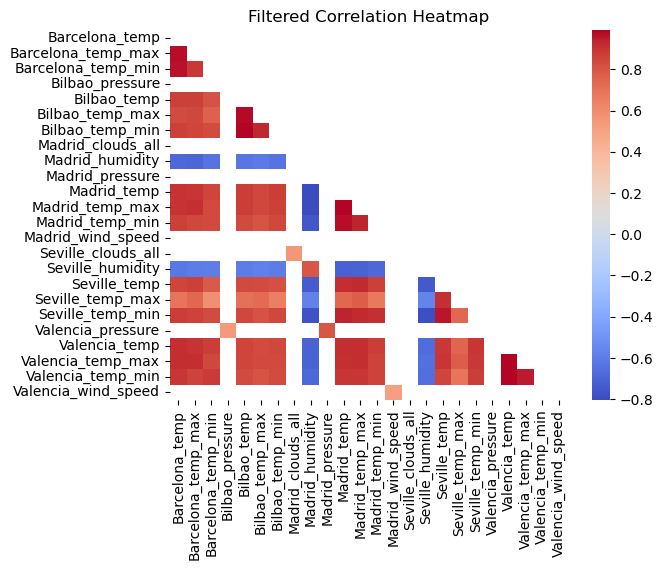

In [91]:
# Dropping unwanted columns
columns_to_remove = [col for col in train.columns if col == 'Unnamed: 0' or col.endswith('_id')]
train.drop(columns=columns_to_remove, inplace=True)

# Select only numeric columns
numeric_cols = train.select_dtypes(include=[np.number]).columns

# Sort the columns
sorted_cols = sorted(numeric_cols)

# Create a correlation matrix of the sorted columns
correlation_matrix = train[sorted_cols].corr()
thresholded = (np.abs(correlation_matrix) >= 0.5) & (correlation_matrix != 1)
filtered_correlation_matrix = correlation_matrix.where(thresholded, np.nan)
filtered_correlation_matrix = filtered_correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Create a mask for the upper triangle
mask_upper = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))

# Plot the heatmap with the mask for the upper triangle
sns.heatmap(filtered_correlation_matrix, mask=mask_upper, annot=False, cmap='coolwarm')
plt.title('Filtered Correlation Heatmap')
plt.show()


## Modelling

### Transforming categorical variables into numeric

In [5]:
#train=pd.read_csv('df_train.csv')
#test=pd.read_csv('df_test.csv')

L=LabelEncoder()

n=train[['Valencia_wind_deg','Seville_pressure']]
m=test[['Valencia_wind_deg','Seville_pressure']]

for i in n:
    n[i]=L.fit_transform(n[i])
for o in m:
    label=LabelEncoder()
    m[o]=label.fit_transform(m[o])

train[['Valencia_wind_deg','Seville_pressure']]=n
test[['Valencia_wind_deg','Seville_pressure']]=m

train.dtypes.value_counts(),test.dtypes.value_counts()

s=SimpleImputer(strategy="most_frequent")
si=SimpleImputer(strategy="most_frequent")
train[['Valencia_pressure']]=s.fit_transform(train[['Valencia_pressure']])
test[['Valencia_pressure']]=si.fit_transform(test[['Valencia_pressure']])

### Creating dataset with filtered columns

In [6]:
selected_features = [col for col in train.columns if not any(suffix in col for suffix in ['Unnamed: 0', 'time', '_humidity', '_temp_max', '_temp_min', 'Barcelona_rain_3h', 'Seville_rain_3h', '_pressure'])]
train_2 = train[selected_features]
selected_features_t = [col for col in test.columns if not any(suffix in col for suffix in ['_humidity', '_temp_max', '_temp_min', 'Barcelona_rain_3h', 'Seville_rain_3h', '_pressure'])]
test_2 = test[selected_features_t]

### Modelling

In [7]:
setup(train,target="load_shortfall_3h",ignore_features=['Unnamed: 0', 'time'],normalize_method="robust")

,Description,Value
0,Session id,4068
1,Target,load_shortfall_3h
2,Target type,Regression
3,Original data shape,"(8763, 49)"
4,Transformed data shape,"(8763, 47)"
5,Transformed train set shape,"(6134, 47)"
6,Transformed test set shape,"(2629, 47)"
7,Ignore features,2
8,Numeric features,46
9,Preprocess,True


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [16]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3412.1069,18834916.8707,4336.6944,0.3093,0.7091,1.6436,0.5800
rf,Random Forest Regressor,3448.7693,19141134.8341,4372.2790,0.2979,0.7169,1.6448,1.6820
lightgbm,Light Gradient Boosting Machine,3486.6607,19475577.3530,4411.0442,0.2855,0.7158,1.6261,0.3040
gbr,Gradient Boosting Regressor,3689.4259,21730451.9721,4659.7673,0.2026,0.7391,1.7854,0.6690
lasso,Lasso Regression,3848.7092,23586281.2000,4853.8656,0.1349,0.7565,1.7607,0.0210
ridge,Ridge Regression,3848.9898,23586890.6000,4853.9215,0.1349,0.7563,1.7586,0.0060
llar,Lasso Least Angle Regression,3849.3404,23590154.2000,4854.2620,0.1348,0.7563,1.7595,0.0060
br,Bayesian Ridge,3855.2662,23663862.4000,4861.9141,0.1321,0.7578,1.7729,0.0090
en,Elastic Net,3856.3310,23675950.4000,4863.1524,0.1316,0.7580,1.7745,0.0240
lr,Linear Regression,3849.6635,23691006.2000,4863.8872,0.1313,0.7563,1.7620,0.2400


ExtraTreesRegressor(n_jobs=-1, random_state=3542)

In [8]:
best=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3423.7434,19176234.1777,4379.0677,0.2924,0.6386,0.9042
1,3306.8838,17775574.3390,4216.1089,0.3241,0.7093,1.5227
2,3324.3913,17902628.5206,4231.1498,0.2982,0.6365,0.9806
3,3607.1361,20993558.9945,4581.8729,0.3026,0.6892,1.1126
4,3444.8272,19139981.8632,4374.9265,0.3099,0.7625,2.1592
5,3564.6679,20975657.7787,4579.9190,0.2897,0.8348,4.1624
6,3525.5556,20027993.5576,4475.2646,0.2644,0.7476,1.5019
7,3464.0430,18938252.8999,4351.8103,0.2824,0.8006,3.0493
8,3452.5119,18546486.6488,4306.5632,0.2813,0.6759,1.0679


### Predictions

In [9]:
predictions=best.predict(test.drop(['Unnamed: 0', 'time'],axis=1))
predictions

test_shortfall=pd.DataFrame({'time':test.time,"load_shortfall_3h":predictions})
test_shortfall.tail()

,time,load_shortfall_3h
2915,2018-12-31 09:00:00,8253.706720
2916,2018-12-31 12:00:00,10803.943344
2917,2018-12-31 15:00:00,11623.303295
2918,2018-12-31 18:00:00,12856.226625
2919,2018-12-31 21:00:00,9576.733302


### Variable importance

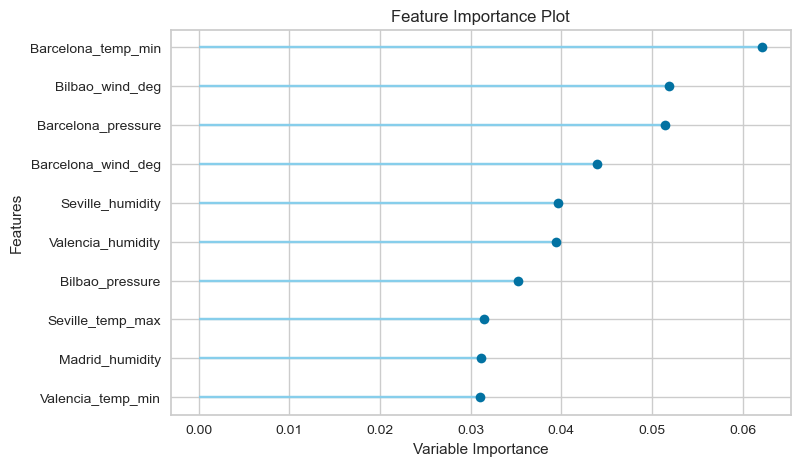

In [10]:
plot_model(best, plot = 'feature')

### SHAP to determine suitable location for new infrastructure

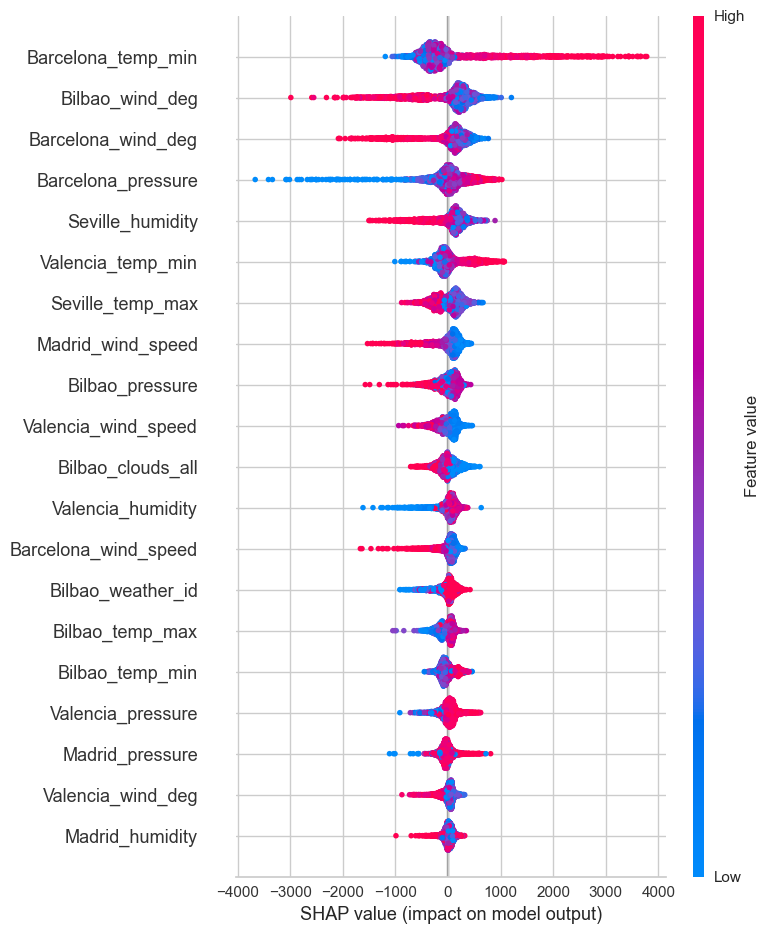

In [11]:
# import shap
# from sklearn.preprocessing import OneHotEncoder
# from itertools import chain
# from collections import defaultdict

interpret_model(best)

### Distribution of predictions

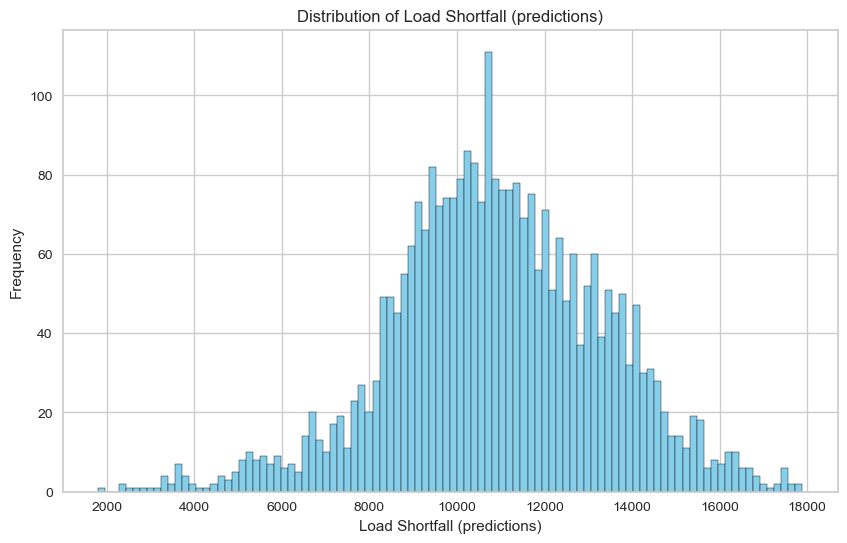

In [60]:
# Plot the distribution of the shortfall values (predictions)

plt.figure(figsize=(10, 6))
plt.hist(test_shortfall['load_shortfall_3h'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Load Shortfall (predictions)')
plt.xlabel('Load Shortfall (predictions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [67]:
total_shortfall_sum = test_shortfall['load_shortfall_3h'].sum()
quarter_of_shortfall = total_shortfall_sum * 0.25
print("25% of the predicted shortfall: ", quarter_of_shortfall, "MWh")

25% of the predicted shortfall:  7972936.67131841 MWh
